# FMCW Radar

<a href="https://rookiepeng.github.io/radarsimpy/" target="_blank" rel="nofollow"><img src="https://img.shields.io/badge/Documentation-latest-brightgree?style=flat&logo=read-the-docs" height="20" align="left"></a>

<br></br>
This is an FMCW radar simulation example based on [`RadarSimPy`](https://github.com/rookiepeng/radarsimpy).


## Radar Model

### Transmitter

Setup the basic transmitter parameters through `Transmitter` module.

The following table lists the parameters in this example.

 | Parameter                       | Variable in `Transmitter`| Value                |
 |---------------------------------|--------------------------|----------------------|
 | Frequency ($f$)                 | `f`                      | [24.075, 24.175] GHz |
 | Time ($T$)                      | `t`                      | 80e-6 s              |
 | Transmitted power ($P_t$)       | `tx_power`               | 10 dBm               |
 | Pulse repetition period ($PRP$) | `prp`                    | 100 us               |
 | Number of pulses                | `pulses`                 | 256                  |

Here, `f` and `t` define the frequency modulation of the transmitter. The frequency changes from `24.075 GHz` to `24.175 GHz` within `80e-6 s`.

In [1]:
import numpy as np
from radarsimpy import Radar, Transmitter, Receiver

tx_channel = dict(
    location=(0, 0, 0),
)

f_offset = np.arange(0, -743203072, -2903137)

prp = np.array([5.3302013e-05, 5.3306039e-05, 5.3310066e-05, 5.3314094e-05, 5.3318121e-05, 5.332215e-05, 5.3326178e-05, 5.3330207e-05, 5.3334237e-05, 5.3338267e-05, 5.3342298e-05, 5.3346328e-05, 5.335036e-05, 5.3354392e-05, 5.3358424e-05, 5.3362457e-05, 5.336649e-05, 5.3370524e-05, 5.3374558e-05, 5.3378593e-05, 5.3382628e-05, 5.3386663e-05, 5.3390699e-05, 5.3394736e-05, 5.3398773e-05, 5.340281e-05, 5.3406848e-05, 5.3410886e-05, 5.3414925e-05, 5.3418964e-05, 5.3423004e-05, 5.3427044e-05, 5.3431084e-05, 5.3435125e-05, 5.3439167e-05, 5.3443209e-05, 5.3447251e-05, 5.3451294e-05, 5.3455337e-05, 5.3459381e-05, 5.3463425e-05, 5.346747e-05, 5.3471515e-05, 5.3475561e-05, 5.3479607e-05, 5.3483653e-05, 5.34877e-05, 5.3491748e-05, 5.3495796e-05, 5.3499844e-05, 5.3503893e-05, 5.3507942e-05, 5.3511992e-05, 5.3516042e-05, 5.3520093e-05, 5.3524144e-05, 5.3528196e-05, 5.3532248e-05, 5.35363e-05, 5.3540353e-05, 5.3544407e-05, 5.354846e-05, 5.3552515e-05, 5.355657e-05, 5.3560625e-05, 5.3564681e-05, 5.3568737e-05, 5.3572793e-05, 5.3576851e-05, 5.3580908e-05, 5.3584966e-05, 5.3589025e-05, 5.3593084e-05, 5.3597143e-05, 5.3601203e-05, 5.3605263e-05, 5.3609324e-05, 5.3613385e-05, 5.3617447e-05, 5.3621509e-05, 5.3625572e-05, 5.3629635e-05, 5.3633699e-05, 5.3637763e-05, 5.3641827e-05, 5.3645892e-05, 5.3649958e-05, 5.3654023e-05, 5.365809e-05, 5.3662157e-05, 5.3666224e-05, 5.3670292e-05, 5.367436e-05, 5.3678428e-05, 5.3682498e-05, 5.3686567e-05, 5.3690637e-05, 5.3694708e-05, 5.3698779e-05, 5.370285e-05, 5.3706922e-05, 5.3710994e-05, 5.3715067e-05, 5.371914e-05, 5.3723214e-05, 5.3727288e-05, 5.3731363e-05, 5.3735438e-05, 5.3739514e-05, 5.374359e-05, 5.3747666e-05, 5.3751743e-05, 5.3755821e-05, 5.3759899e-05, 5.3763977e-05, 5.3768056e-05, 5.3772135e-05, 5.3776215e-05, 5.3780295e-05, 5.3784376e-05, 5.3788457e-05, 5.3792539e-05, 5.3796621e-05, 5.3800704e-05, 5.3804787e-05, 5.380887e-05, 5.3812954e-05, 5.3817039e-05,
               5.3821123e-05, 5.3825209e-05, 5.3829295e-05, 5.3833381e-05, 5.3837468e-05, 5.3841555e-05, 5.3845643e-05, 5.3849731e-05, 5.3853819e-05, 5.3857908e-05, 5.3861998e-05, 5.3866088e-05, 5.3870178e-05, 5.3874269e-05, 5.3878361e-05, 5.3882453e-05, 5.3886545e-05, 5.3890638e-05, 5.3894731e-05, 5.3898825e-05, 5.3902919e-05, 5.3907014e-05, 5.3911109e-05, 5.3915204e-05, 5.3919301e-05, 5.3923397e-05, 5.3927494e-05, 5.3931592e-05, 5.393569e-05, 5.3939788e-05, 5.3943887e-05, 5.3947986e-05, 5.3952086e-05, 5.3956186e-05, 5.3960287e-05, 5.3964388e-05, 5.396849e-05, 5.3972592e-05, 5.3976695e-05, 5.3980798e-05, 5.3984901e-05, 5.3989005e-05, 5.399311e-05, 5.3997215e-05, 5.400132e-05, 5.4005426e-05, 5.4009532e-05, 5.4013639e-05, 5.4017747e-05, 5.4021854e-05, 5.4025963e-05, 5.4030071e-05, 5.403418e-05, 5.403829e-05, 5.40424e-05, 5.4046511e-05, 5.4050622e-05, 5.4054733e-05, 5.4058845e-05, 5.4062958e-05, 5.4067071e-05, 5.4071184e-05, 5.4075298e-05, 5.4079412e-05, 5.4083527e-05, 5.4087642e-05, 5.4091758e-05, 5.4095874e-05, 5.4099991e-05, 5.4104108e-05, 5.4108226e-05, 5.4112344e-05, 5.4116462e-05, 5.4120581e-05, 5.4124701e-05, 5.4128821e-05, 5.4132941e-05, 5.4137062e-05, 5.4141184e-05, 5.4145305e-05, 5.4149428e-05, 5.4153551e-05, 5.4157674e-05, 5.4161798e-05, 5.4165922e-05, 5.4170046e-05, 5.4174172e-05, 5.4178297e-05, 5.4182423e-05, 5.418655e-05, 5.4190677e-05, 5.4194804e-05, 5.4198932e-05, 5.4203061e-05, 5.420719e-05, 5.4211319e-05, 5.4215449e-05, 5.4219579e-05, 5.422371e-05, 5.4227841e-05, 5.4231973e-05, 5.4236105e-05, 5.4240238e-05, 5.4244371e-05, 5.4248505e-05, 5.4252639e-05, 5.4256774e-05, 5.4260909e-05, 5.4265044e-05, 5.426918e-05, 5.4273317e-05, 5.4277454e-05, 5.4281591e-05, 5.4285729e-05, 5.4289867e-05, 5.4294006e-05, 5.4298146e-05, 5.4302285e-05, 5.4306426e-05, 5.4310566e-05, 5.4314708e-05, 5.4318849e-05, 5.4322991e-05, 5.4327134e-05, 5.4331277e-05, 5.4335421e-05, 5.4339565e-05, 5.4343709e-05])

tx = Transmitter(f=[76990079472.5000, 76750220463.5000],
                 t=4.92e-05,
                 f_offset=f_offset,
                 tx_power=10,
                 prp=prp,
                 pulses=256,
                 channels=[tx_channel])


### Receiver

Setup the receiver parameters through `Receiver` module.

The parameters of the receiver are listed in the table below.

 | Parameter                        | Variable in `Receiver`   | Value        |
 |----------------------------------|--------------------------|--------------|
 | Sampling rate ($f_s$)            | `fs`                     | 2 Msps       |
 | Noise figure ($NF$)              | `noise_figure`           | 12 dB        |
 | RF gain/loss ($G_{rf}$)          | `rf_gain`                | 20 dB        |
 | Load resistor ($R_L$)            | `load_resistor`          | 500 $\Omega$ |
 | Baseband voltage gain ($G_{BB}$) | `baseband_gain`          | 30 dB        |


In [2]:
rx_channel = dict(
    location=(0, 0, 0),
)

rx = Receiver(fs=20e6,
              noise_figure=12,
              rf_gain=20,
              load_resistor=500,
              baseband_gain=30,
              channels=[rx_channel])


 Create the FMCW radar model based on all the parameters defined above.

In [3]:
radar = Radar(transmitter=tx, receiver=rx)


 Calculate the characteristics of the FMCW radar:

 - Maximum range (*with I/Q baseband*): $$R_{max}=\frac{c f_s T}{2B}$$

 - Maximum range (*without I/Q baseband*): $$R_{max}=\frac{c f_s T}{4B}$$

 - Unambiguous velocity: $$v_{ua}=\frac{c}{2 CRP \times f_c}$$ or $$v_{ua}=\pm \frac{c}{4 CRP \times f_c}$$

 - Range resolution: $$\delta_r=\frac{c}{2B}$$


### Targets

The propertities of targets are defined here. There are 3 targets in this simulation. The locations of the targets are defined through $(x, y, z)$ coordinates in meters, and the speeds of the targets are defined trough $(v_x, v_y, v_z)$ in $m/s$. The propertites of the targets also includes radar cross-section (RCS (dBsm)) and phase (degree).

In [4]:
target_1 = dict(location=(60, 0, 0), speed=(0, 0, 0), rcs=20, phase=0)

targets = [target_1]


## Simulate Baseband Signals
 
Use the `simulator` module to simulate the baseband samples. The user can choose between Python engine `simpy` or C++ engine `simc`.

The output baseband data is a 3-D matrix:

$[channels, pulses, ADC~samples]$

In [5]:
# Python engine
from radarsimpy.simulator import simpy
# C++ engine
from radarsimpy.simulator import simc

bb_data = simc(radar, targets, noise=False)
time_matrix = bb_data['timestamp']
data_matrix = bb_data['baseband']


Plot the baseband samples

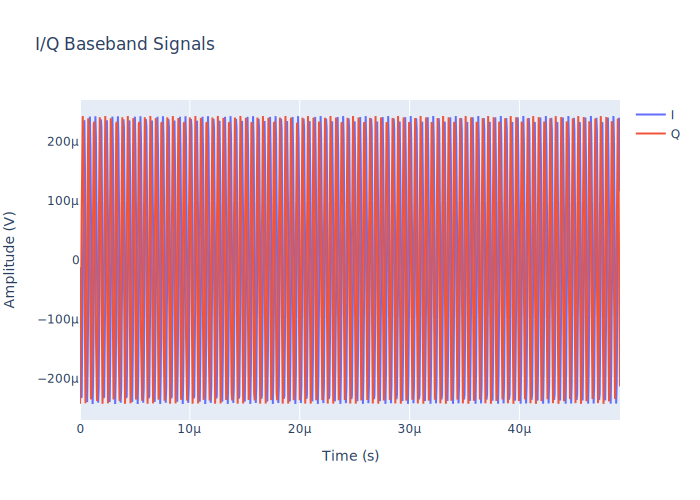

In [6]:
import plotly.graph_objs as go
from IPython.display import SVG, display

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=time_matrix[0, 0, :],
    y=np.real(data_matrix[0, 0, :]),
    name='I',
))
fig.add_trace(go.Scatter(
    x=time_matrix[0, 0, :],
    y=np.imag(data_matrix[0, 0, :]),
    name='Q',
))

fig.update_layout(
    title='I/Q Baseband Signals',
    yaxis=dict(title='Amplitude (V)'),
    xaxis=dict(title='Time (s)'),
)

# fig.show()
display(SVG(fig.to_image(format='svg', scale=1)))


 ## Radar Signal Processing
 ### Range profile

In [7]:
from scipy import signal
import radarsimpy.processing as proc

range_window = signal.chebwin(radar.samples_per_pulse, at=60)
range_profile = proc.cal_range_profile(
    radar, data_matrix, range_window, n=1024)


Plot range profiles

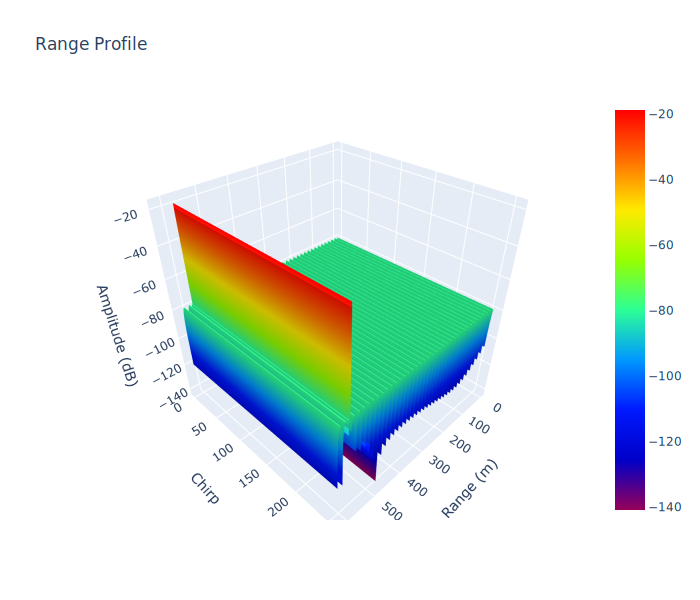

In [8]:
max_range = (3e8 * radar.receiver.fs *
             radar.transmitter.pulse_length /
             radar.transmitter.bandwidth / 2)

range_axis = np.linspace(
    0, max_range, radar.samples_per_pulse, endpoint=False)

doppler_axis = np.linspace(
    0, radar.transmitter.pulses, radar.transmitter.pulses, endpoint=False)

fig = go.Figure()

fig.add_trace(go.Surface(x=range_axis, y=doppler_axis, z=20 *
              np.log10(np.abs(range_profile[0, :, :])), colorscale='Rainbow'))

fig.update_layout(
    title='Range Profile',
    height=600,
    scene=dict(
        xaxis=dict(title='Range (m)'),
        yaxis=dict(title='Chirp'),
        zaxis=dict(title='Amplitude (dB)'),
        aspectmode='cube',
    ),
)

# fig.show()
display(SVG(fig.to_image(format='svg', scale=1)))


 ### Range-Doppler processing

In [9]:
doppler_window = signal.chebwin(radar.transmitter.pulses, at=60)
range_doppler = proc.cal_range_doppler(
    radar, range_profile, doppler_window, fft_shift=False)


Plot range-Doppler map

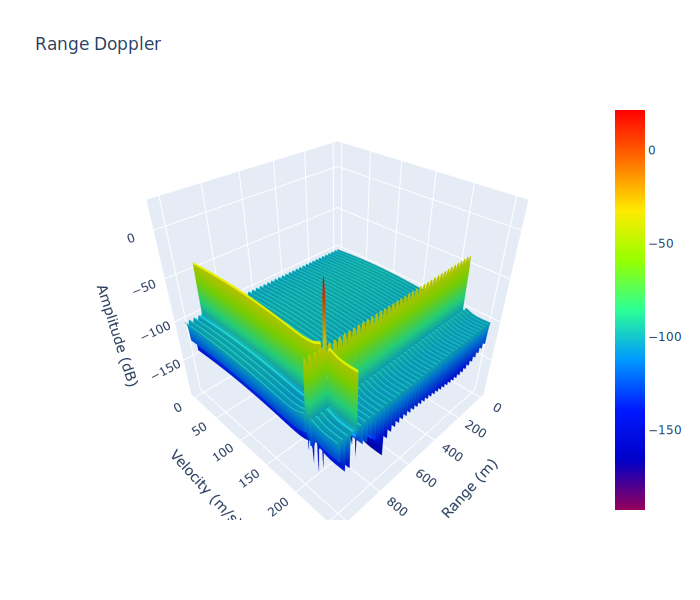

In [10]:
range_axis = np.arange(0, 1024, 1)

doppler_axis = np.arange(0, 256, 1)

fig = go.Figure()
fig.add_trace(go.Surface(x=range_axis, y=doppler_axis, z=20 *
              np.log10(np.abs(range_doppler[0, :, :])), colorscale='Rainbow'))

fig.update_layout(
    title='Range Doppler',
    height=600,
    scene=dict(
        xaxis=dict(title='Range (m)'),
        yaxis=dict(title='Velocity (m/s)'),
        zaxis=dict(title='Amplitude (dB)'),
        aspectmode='cube',
    ),
)

# fig.show()
display(SVG(fig.to_image(format='svg', scale=1)))
